In [1]:
#Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the Excel file
file_path = 'E:\Afame\Project 1\ECOMM DATA.xlsx'
data = pd.read_excel(file_path)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\deepa\AppData\Local\Temp\ipykernel_2788\1358041307.py:1: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'E:\Afame\Project 1\ECOMM DATA.xlsx'


In [4]:
#Display the first few rows of the dataset
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
#Calculate total sales
total_sales = data['Sales'].sum()
total_sales

12642501.909880001

In [6]:
#Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

#Aggregate sales data on a monthly basis
monthly_sales = data.resample('M', on='Order Date')['Sales'].sum()

#Same step as above displaying the first few rows of the monthly sales data
monthly_sales.head()

C:\Users\deepa\AppData\Local\Temp\ipykernel_2788\2222302583.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='Order Date')['Sales'].sum()


Order Date
2011-01-31     98898.48886
2011-02-28     91152.15698
2011-03-31    145729.36736
2011-04-30    116915.76418
2011-05-31    146747.83610
Freq: ME, Name: Sales, dtype: float64

In [9]:
#Aggregate total sales and quantity sold for each product
product_sales = data.groupby('Product Name').agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()

#Top 10 best-selling products by total sales
top_10_products_by_sales = product_sales.sort_values(by='Sales', ascending=False).head(10)

#Top 10 best-selling products by quantity sold
top_10_products_by_quantity = product_sales.sort_values(by='Quantity', ascending=False).head(10)


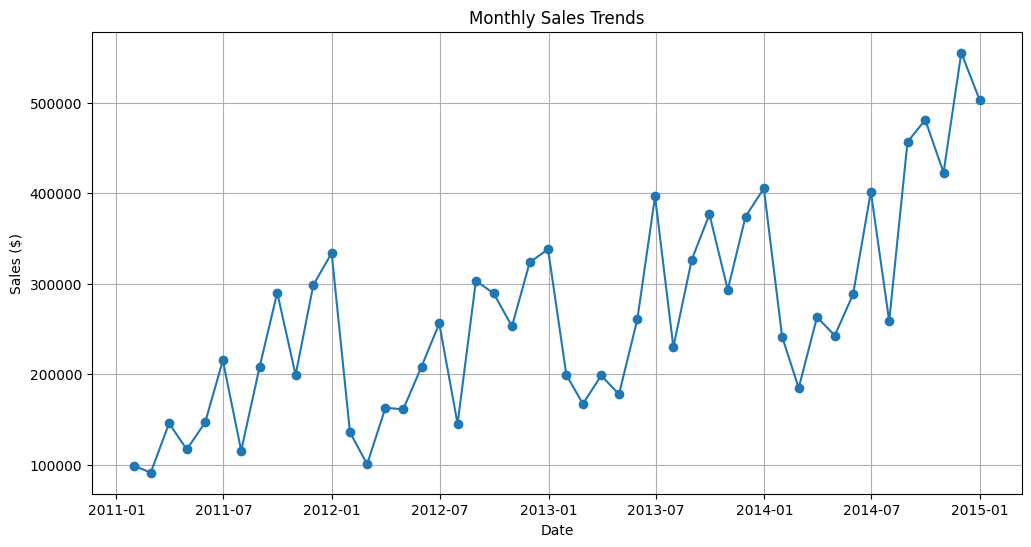

In [7]:
#Plotting the monthly sales trends using the matplotlib

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

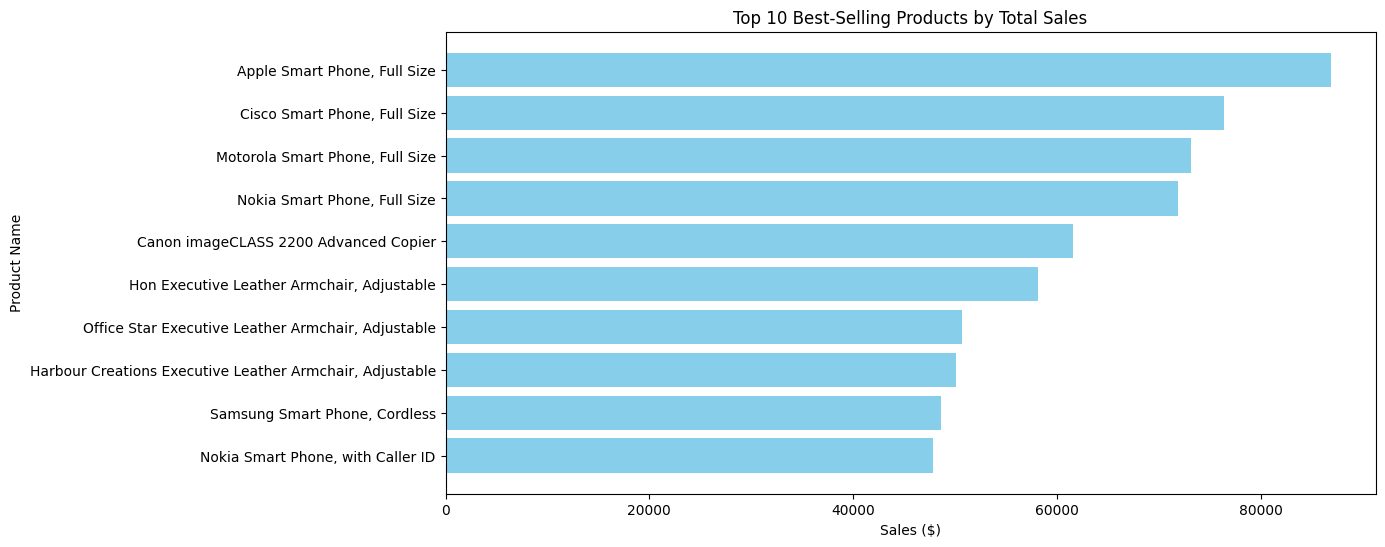

In [10]:
#Plotting the top 10 best-selling products by total sales
plt.figure(figsize=(12, 6))
plt.barh(top_10_products_by_sales['Product Name'], top_10_products_by_sales['Sales'], color='skyblue')
plt.title('Top 10 Best-Selling Products by Total Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

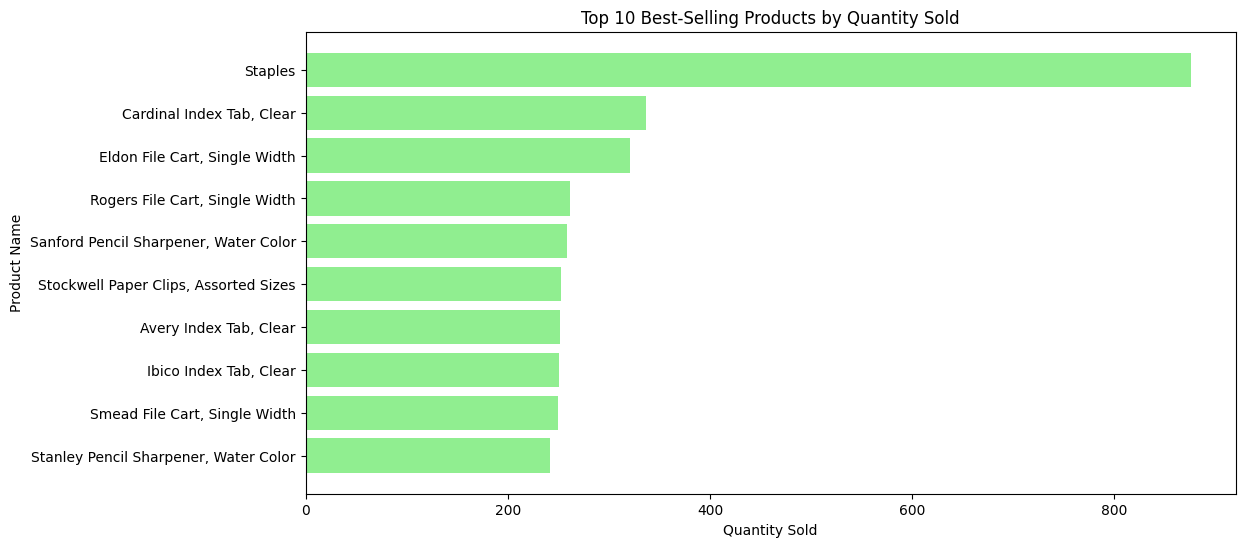

In [11]:
#Plotting the top 10 best-selling products by quantity sold
plt.figure(figsize=(12, 6))
plt.barh(top_10_products_by_quantity['Product Name'], top_10_products_by_quantity['Quantity'], color='lightgreen')
plt.title('Top 10 Best-Selling Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()


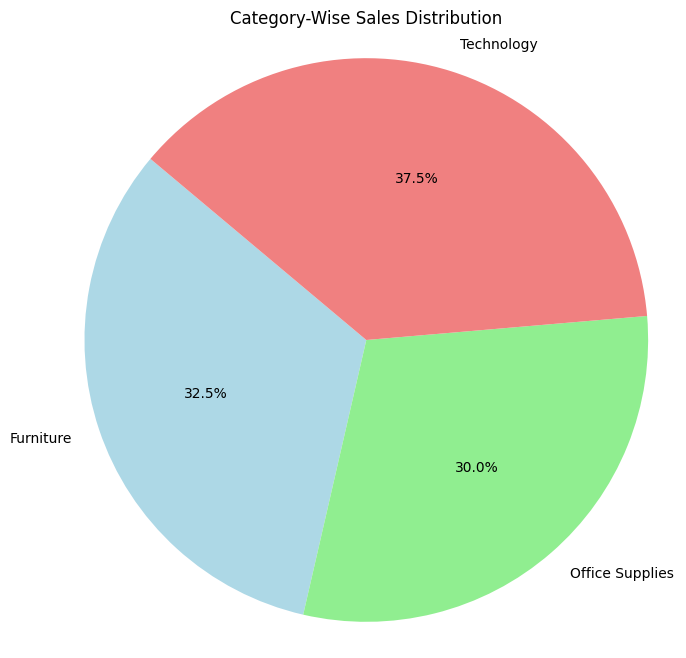

In [12]:
#Aggregate total sales by category
category_sales = data.groupby('Category').agg({'Sales': 'sum'}).reset_index()

#Plotting category-wise sales distribution
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Category-Wise Sales Distribution')
plt.axis('equal')
plt.show()
